**Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.**

## Importing libraries

In [190]:
#Installing prophet
#%%capture
!pip install prophet

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet
from statsmodels.tsa.stattools import adfuller
from prophet.plot import plot_plotly, plot_components_plotly
from statsmodels.tools.eval_measures import rmse
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

## Loading Dataset

In [191]:
# Reading the dataframe

df = pd.read_csv('daily-total-female-births-CA.csv')
display(df.head())
display(df.tail())

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


,date,births
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55
364,1959-12-31,50


In [192]:
df.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    365 non-null    object
 1   births  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


## EDA

<ipython-input-194-21f4a0028e76>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='births', ylabel='Density'>

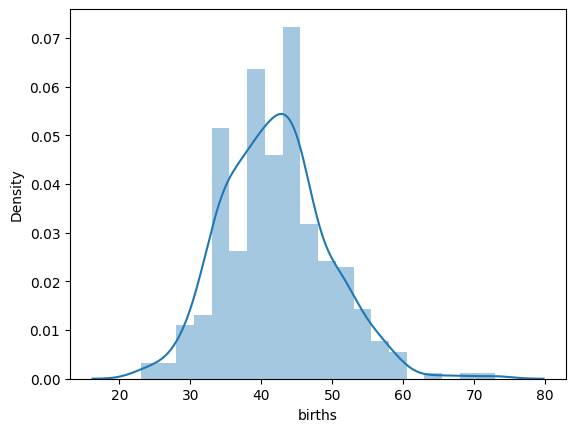

In [194]:
sns.distplot(df['births'])

<Axes: >

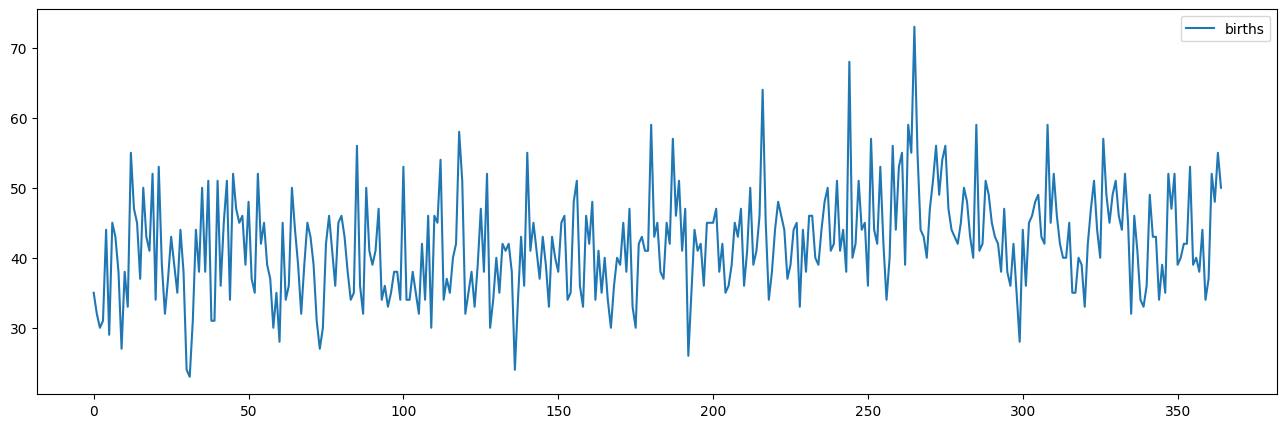

In [195]:
#Plotting the line chart
df.plot(figsize=(16,5))

<Axes: >

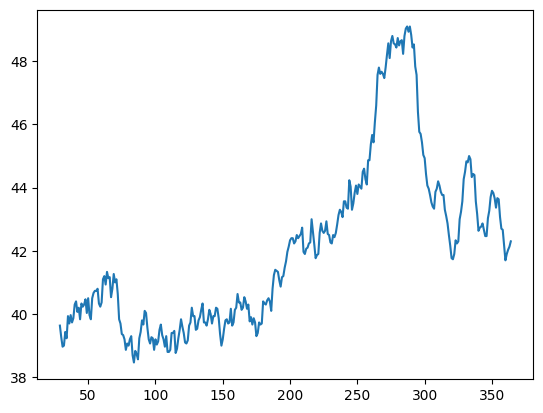

In [196]:
# to smoothen the curve
df['births'].rolling(window=30).mean().plot()

## EDA2

In [197]:
def stationary_test(feat):
  mean = df[feat].rolling(window=7).mean()
  std =  df[feat].rolling(window=7).std()
  plt.figure(figsize=(10,5))
  mean.plot(label='Mean')
  std.plot(label='Std')
  df[feat].plot(label='Given {}'.format(feat))
  plt.legend()

  res = adfuller(df[feat].dropna())
  labels = ['The test statistic.', 'pvalue', 'usedlag', 'nobs']
  for i,j in zip(res, labels):
    print(j, "-", i)
  if res[1]<0.05:
    print('We have strong evidence against H0, and thus we will reject it. The data is Stationary !!')
  else:
    print('We do not have strong evidence against H0, and thus we wont reject it. The data is not Stationary !!')

The test statistic. - -4.808291253559765
pvalue - 5.2434129901498554e-05
usedlag - 6
nobs - 358
We have strong evidence against H0, and thus we will reject it. The data is Stationary !!


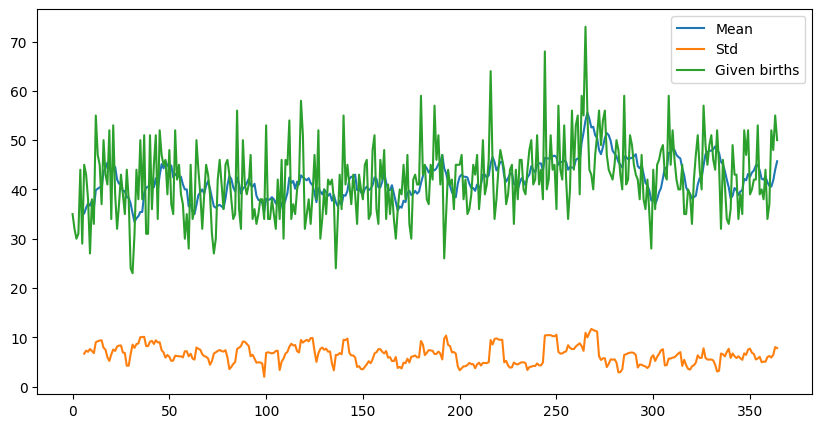

In [198]:
stationary_test('births')

## Facebook Prophet Model

In [199]:
#Renaming the columns acc to the libaray req

df.columns = ['ds','y']
df.head()

,ds,y
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [200]:
#converting the ds column into date time format

df['ds'] = pd.to_datetime(df['ds'])

In [201]:
#to have a look at all the functions available inside the prophet library

dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 '_logistic_uncertainty',
 '_make_historical_mat_time',
 '_make_trend_shift_matrix',
 '_sample_uncertainty',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'p

In [202]:
df

,ds,y
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
...,...,...
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55


In [203]:
train = df[:320]
test = df[320:]

In [204]:
# Initialize the Model

model=Prophet()

In [205]:
#Dropping the nulls if any

df.dropna(axis=0,inplace=True)

In [206]:
display(df)

,ds,y
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
...,...,...
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55


In [207]:
#Fitting the model
model.fit(train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv6hgwlk7/615w1_b1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv6hgwlk7/y3p2uyl1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96836', 'data', 'file=/tmp/tmpv6hgwlk7/615w1_b1.json', 'init=/tmp/tmpv6hgwlk7/y3p2uyl1.json', 'output', 'file=/tmp/tmpv6hgwlk7/prophet_modelcpk2s1h6/prophet_model-20230714153207.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:32:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:32:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [208]:
#Cheking the last date in the dataframe
#We have one whole year of data

train.tail()

,ds,y
315,1959-11-12,45
316,1959-11-13,35
317,1959-11-14,35
318,1959-11-15,40
319,1959-11-16,39


In [209]:
### Create future dates of 365 days

future_dates=model.make_future_dataframe(periods=365)

In [210]:
display(future_dates)

,ds
0,1959-01-01
1,1959-01-02
2,1959-01-03
3,1959-01-04
4,1959-01-05
...,...
680,1960-11-11
681,1960-11-12
682,1960-11-13
683,1960-11-14


In [211]:
#Making the Prediction

prediction=model.predict(future_dates)

In [212]:
# Displaying the Prediction
prediction[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
680,1960-11-11,55.012777,46.382373,63.870099
681,1960-11-12,54.624529,45.033465,62.847930
682,1960-11-13,52.191949,43.292594,60.473716
683,1960-11-14,53.195521,44.217189,61.553564
684,1960-11-15,57.018463,47.748688,65.855540


In [213]:
### plot the predicted projection
plot_plotly(model, prediction)

In [214]:
#### Visualize Each Components[Trends,yearly]
plot_components_plotly(model, prediction)

In [215]:
print("Root Mean Squared Error between actual and  predicted values: ",rmse(prediction['yhat'][-45:],test['y']))
print("Mean Value of Test Dataset:", test['y'].mean())

Root Mean Squared Error between actual and  predicted values:  12.872200019313434
Mean Value of Test Dataset: 43.644444444444446


## ARIMA Model

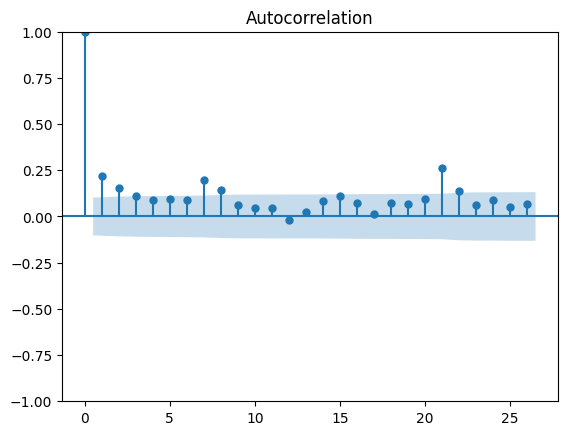

In [216]:
acf = plot_acf(df['y'])

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



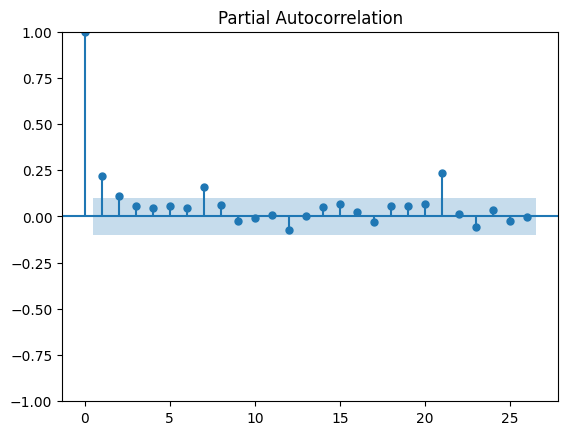

In [217]:
pacf = plot_pacf(df['y'])

Therefore the observed value of p,d,q are 2,0,3

In [218]:
df.set_index('ds', inplace=True)

In [257]:
train = df[:320]
test = df[320:]

In [258]:
train.dtypes

y    int64
dtype: object

In [259]:
arima = ARIMA(train, order=(2,1,3))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [260]:
model = arima.fit()

In [261]:
df2 = df.copy()

In [262]:
df2['forecast'] = model.predict(start=320, end=364, dynamic= True)

<Axes: xlabel='ds'>

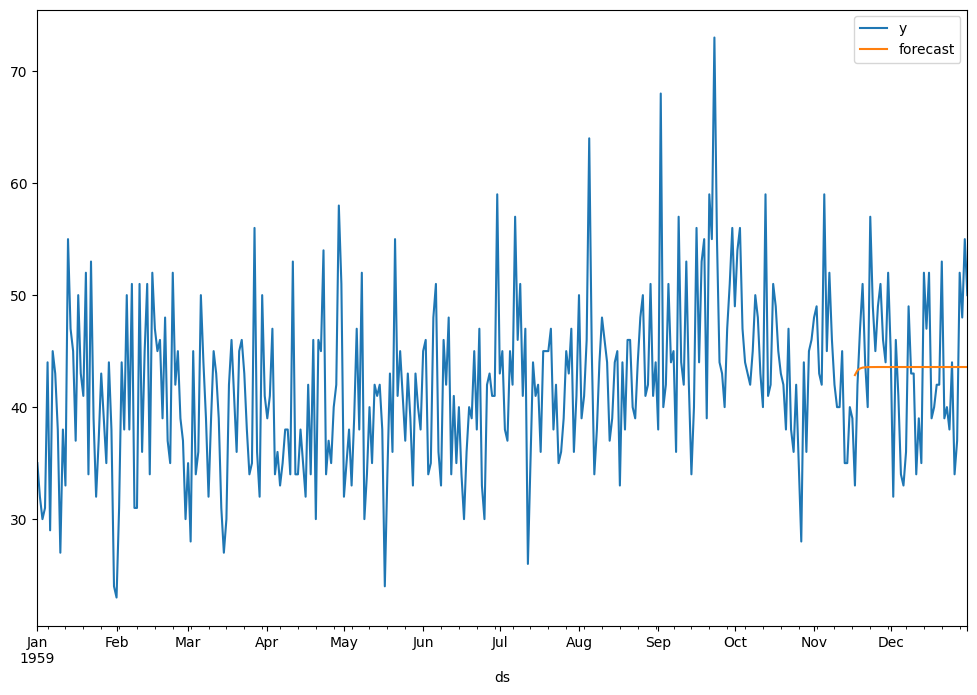

In [263]:
df2[['y','forecast']].plot(figsize=(12,8))

In [264]:
print("Root Mean Squared Error between actual and  predicted values: ",rmse(df2['y'][320:],df2['forecast'][320:]))
print("Mean Value of Test Dataset:", df['y'][320:].mean())

Root Mean Squared Error between actual and  predicted values:  6.536645045764678
Mean Value of Test Dataset: 43.644444444444446


In [265]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(days=x)for x in range(1,300)]
# future_dates

In [266]:
future_datest_df=pd.DataFrame(index=future_dates,columns=df.columns)
future_df=pd.concat([df,future_datest_df])
future_df

,y
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1960-10-21,NaN
1960-10-22,NaN
1960-10-23,NaN
1960-10-24,NaN


In [267]:
future_df['forecast'] = model.predict(start = 364, end = 664, dynamic= True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/kalman_filter.py:2290: ValueWarning:

Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.



<Axes: >

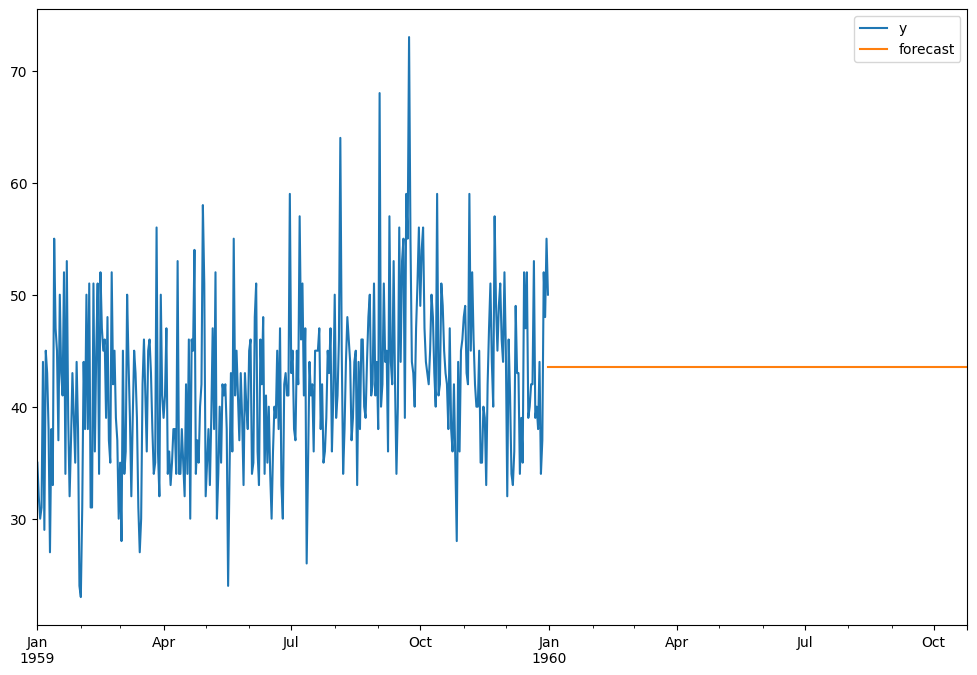

In [268]:
future_df[['y', 'forecast']].plot(figsize=(12, 8))

## Normalization

In [269]:
df

,y
ds,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


In [270]:
from sklearn.preprocessing import MinMaxScaler

In [271]:
scaler = MinMaxScaler()

In [272]:
birth_norm = scaler.fit_transform(df)

In [273]:
train = birth_norm[:320]
test = birth_norm[320:]

In [274]:
arima = ARIMA(train, order=(2,1,3))
model = arima.fit()
pred = model.predict(start=320, end=364)

In [275]:
prediction = scaler.inverse_transform(pred.reshape(1,-1))[0]
actual = scaler.inverse_transform(test.reshape(1,-1))[0]
print("Root Mean Squared Error between actual and  predicted values: ",rmse(prediction,actual))
print("Mean Value of Test Dataset:", actual.mean())

Root Mean Squared Error between actual and  predicted values:  6.536349438189924
Mean Value of Test Dataset: 43.644444444444446


In [276]:
6.536645045764678-6.536349438189924

0.00029560757475444177

Therefore we have enhanced our model

In [277]:
pred = model.predict(start=1, end=730)

In [278]:
new_df = pd.DataFrame(scaler.inverse_transform(pred.reshape(1,-1))[0])

In [279]:
new_df.iloc[320:370]

,0
320,43.274080
321,43.440271
322,43.529110
323,43.557744
324,43.578136
325,43.581698
326,43.587190
327,43.586836
328,43.588670
329,43.588064


<Axes: >

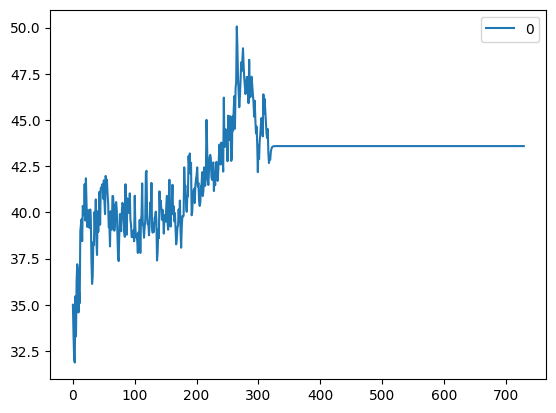

In [280]:
new_df.plot()

There's nothing wrong; that model indeed has constant forecasts -- your 'best' guess at any future value is the last one you observed, since the deviations from that are a sum of future 0-mean noise terms.

I(1)
 model: yt=yt−1+εt

Predictions:

E(yT+1|T) = E(yT|T)+E(εT) = yT+0 = yT

E(yT+2|T) = E(yT+1|T)+E(εT+1) = E(yT+1|T)+0 = yT

and so on.

## Feature Engineering

In [302]:
# df = df.drop(['lag1'], axis=1)

In [303]:
df['lag'] = df['y'].shift(7)
df['roll'] = df['y'].rolling(window=30).mean()

<Axes: xlabel='ds'>

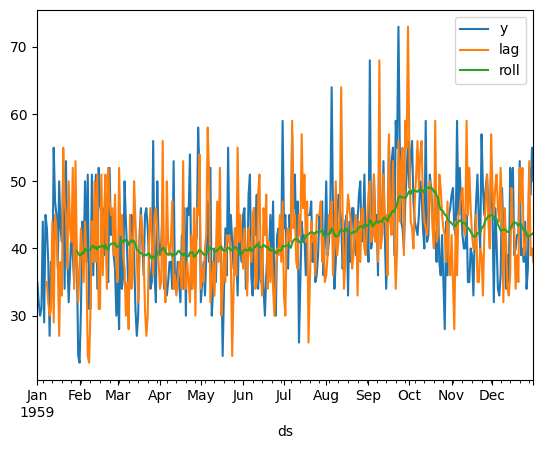

In [304]:
df.plot()

## Hyper Parametre tuning

By performing all possible combination of p,d,q values for arima model